# IDA: Assignment 4

### Deadline: Sunday - November 7 - until 23:59 
#### There will be no deadline extension!!! Because of the start of endterms .


**Instructions:** All answers should be provided in the notebook and then submitted to Moodle. Name of notebook should be in following format:
 - Name_group_Assignment4.ipynb (ex. Mark_Zuckerberg_2009_Assignment4.ipynb). PLEASE, use exactly the **same format.**
 - Try to use fewer cells for compilation (for example, you can use print for several answers, instead of printing each answer on a separate cell)
 - **PLEASE:** submit only one jupyter notebook (no zip or csv files) and with your names as in the instruction. Ohterwise, there will be punishment of 30% from your assignment mark.
 - **IMPORTANT NOTE:** you will get points only for correct answers, not for trials or wrong answers. Your notebook should run when we press **"Restart Kernel"** and then press **"Run All"**. We are going to check answers only after doing that. If your code do not compile and stops at any question, you will get zero for that question.

## Q1 (50%)
1. read data.csv into Pandas dataframe, and then remove NaN observations (5%)
2. for __Projected Annual Salary__ convert it into float (remove _$_ in front of salary) and delete 0's from dataframe (10%)
3. plot distribution of salary using histrogram and comment it (10%)
4. is there any outliers in the dataset? (10%)
5. use scatterplot to see the relationship between __Projected Annual Salary__ and some selected variable. Comment their relationship. (15%)

Notes: use only **matplotlib**

Hint: make sure your plot is properly structured.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")
data.head()

C:\Users\Amir\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [3]:
data.shape

(285008, 35)

In [4]:
# 1.1
data.dropna(how='any', inplace=True)
data.shape

(156986, 35)

In [5]:
# 1.2
w_out = lambda x: float(x[1:])
data['Projected Annual Salary'] = data['Projected Annual Salary'].apply(w_out)
data=data[data['Projected Annual Salary']!=0].dropna()
data.shape

(156798, 35)

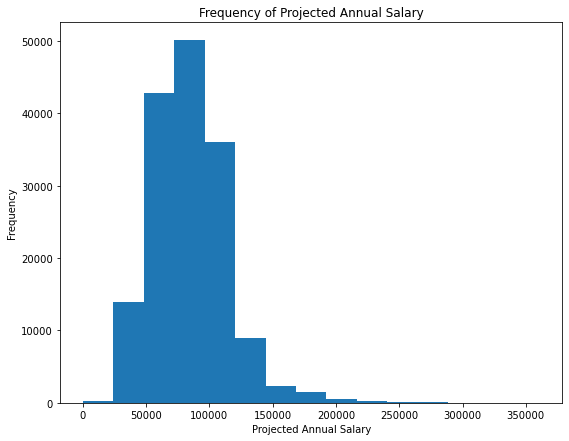

In [6]:
# 1.3
fig, ax = plt.subplots(figsize =(15,12))
ax.set_xlabel('Projected Annual Salary')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Projected Annual Salary')
data['Projected Annual Salary'].hist(bins=15,figsize=(9,7),grid=False);
# each bin = (+25000)

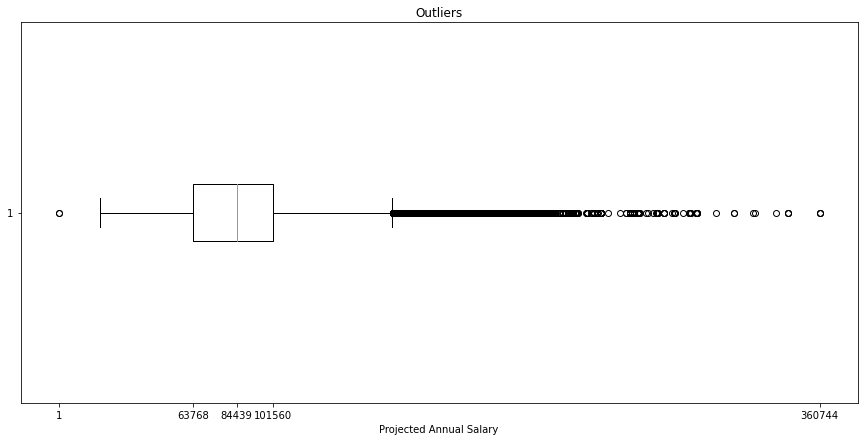

In [7]:
# 1.4
fig, ax = plt.subplots(figsize=(15,7))
ax.boxplot(data['Projected Annual Salary'], vert=False)
ax.set_xlabel('Projected Annual Salary')
ax.set_title('Outliers')
ax.set_xticks(data['Projected Annual Salary'].describe()[3:] )
plt.show()

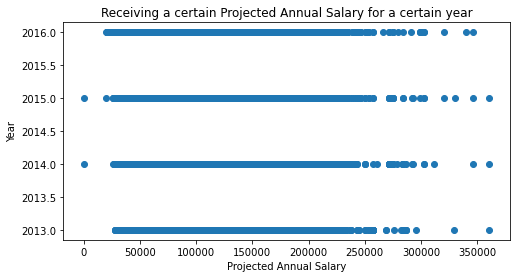

In [8]:
# 1.5
fig2, ax2 = plt.subplots(figsize=(8,4))
ax2.scatter(data['Projected Annual Salary'], data['Year'])
ax2.set(title="Receiving a certain Projected Annual Salary for a certain year", 
        xlabel="Projected Annual Salary",
        ylabel="Year")
plt.show()

## Q2 (50%)
For Coursera dataset (coursea_data.csv), do the tasks below.
1. Find three the most commonly appearing combination of certificate type and course difficulty. Show cerfiticate type, course difficulty and number of courses. (10%)
2. Among 'Data Science' courses, find the course with the 2nd highest rating among Intermediate level courses. For obtained course, show its title, organization, and number of students enrolled. (10%)
3. For organizations from Ivy league (list provided below), find the one that has the highest presence in Coursera, i.e. the largest number of courses. (10%)
4. Continuing from the previous task, for the obtained university, calculate average the rating for each of the certificate types. Show certificate type with mean rating. (10%)
5. Plot two barcharts in the same figure. For one of them get number of courses by their difficulty, and for another get number of courses by certificate type.  Comment your finding from the plots. (10%)

Notes: use only **matplotlib**

Hint: make sure your plot is properly structured.

In [9]:
coursera=pd.read_csv("coursera_data.csv")
coursera.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [10]:
# 2.1
coursera[['course_difficulty','course_Certificate_type']].value_counts().groupby(['course_difficulty']).head()[:3]

course_difficulty  course_Certificate_type
Beginner           COURSE                     282
                   SPECIALIZATION             196
Mixed              COURSE                     187
dtype: int64

In [11]:
# 2.2
coursera[(coursera.course_title.str.lower().str.contains('data science'))&(coursera["course_difficulty"]=='Intermediate')].sort_values(by='course_rating', ascending=False)[1:2]

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
55,637,Applied Data Science Capstone,IBM,COURSE,4.7,Intermediate,42k


In [12]:
ivy_list = ['Brown University', 'Columbia University', 'Cornell University', 'Dartmouth College',
            'Harvard University', 'University of Pennsylvania', 'Princeton University', 'Yale University']

In [13]:
# 2.3
new=coursera['course_organization'].isin(ivy_list)
coursera[new].groupby(['course_organization']).course_title.count().sort_values(ascending=False).head(1)

course_organization
University of Pennsylvania    59
Name: course_title, dtype: int64

In [14]:
# 2.4
coursera[new].groupby(['course_organization','course_Certificate_type','course_rating']).course_title.count().sort_values(ascending=False)
coursera[new].groupby('course_Certificate_type').course_rating.mean()

course_Certificate_type
COURSE            4.747692
SPECIALIZATION    4.650000
Name: course_rating, dtype: float64

In [15]:
by_difficulty=coursera["course_difficulty"].value_counts()
by_difficulty

Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: course_difficulty, dtype: int64

In [16]:
by_course_certificate_type=coursera["course_Certificate_type"].value_counts()
by_course_certificate_type

COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: course_Certificate_type, dtype: int64

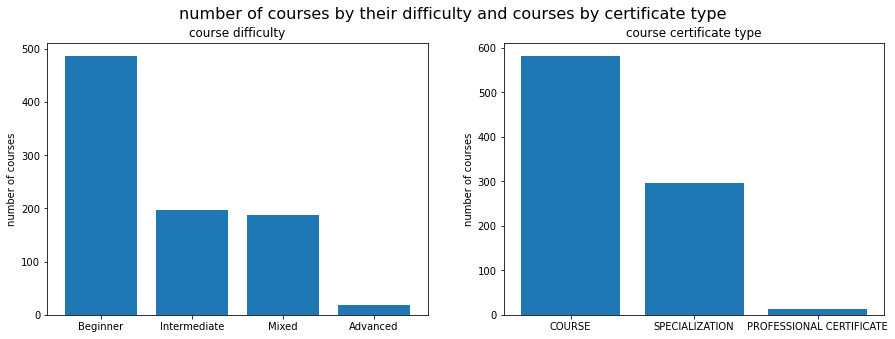

In [17]:
# 2.5
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

axs[0].bar(by_difficulty.index, by_difficulty)
axs[0].set(xticks=by_difficulty.index, ylabel="number of courses", title="course difficulty")

axs[1].bar(by_course_certificate_type.index, by_course_certificate_type)
axs[1].set(xticks=by_course_certificate_type.index, ylabel="number of courses", title="course certificate type")


fig.suptitle("number of courses by their difficulty and courses by certificate type", size=16)
plt.show()

---

### Evaluation (Keep it!)

| Question | Mark     | Comment   
|:-------:|:--------:|:----------------------
| 1       |   50/50    |     
| 2       |   50/50 | 
|**Total**|**100/100**  | 
